In [7]:
pip install keras

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import cifar100

In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1009251078922439897
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14410383360
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7736392301176488363
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


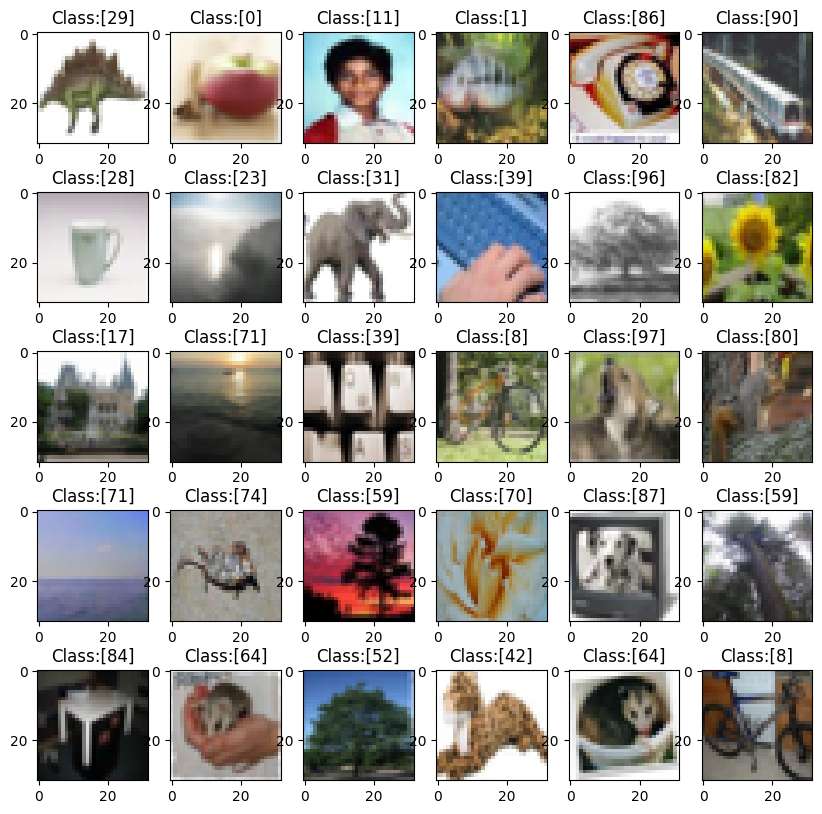

In [23]:
(X_train,y_train),(X_test,y_test)= cifar100.load_data ()
plt.figure(figsize=(10,10))

for i in range(1,31):
  plt.subplot(5,6,i)
  plt.imshow(X_train[i])
  plt.title(f"Class:{y_train[i]}")


plt.show()

In [28]:
pip install keras

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical


In [25]:
y_train= to_categorical(y_train,num_classes=100)
y_test= to_categorical(y_test,num_classes=100)

In [26]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)       

In [31]:
model_trained=model.fit(X_train,y_train,batch_size=500,epochs=150,verbose=1)

Epoch 1/150
100/100 [==============================] - 8s 50ms/step - loss: 4.7909 - accuracy: 0.0278
Epoch 2/150
100/100 [==============================] - 5s 50ms/step - loss: 4.2740 - accuracy: 0.0634
Epoch 3/150
100/100 [==============================] - 5s 50ms/step - loss: 4.0387 - accuracy: 0.0889
Epoch 4/150
100/100 [==============================] - 5s 50ms/step - loss: 3.8767 - accuracy: 0.1119
Epoch 5/150
100/100 [==============================] - 5s 51ms/step - loss: 3.7443 - accuracy: 0.1313
Epoch 6/150
100/100 [==============================] - 5s 50ms/step - loss: 3.6323 - accuracy: 0.1499
Epoch 7/150
100/100 [==============================] - 5s 50ms/step - loss: 3.5346 - accuracy: 0.1669
Epoch 8/150
100/100 [==============================] - 5s 51ms/step - loss: 3.4368 - accuracy: 0.1844
Epoch 9/150
100/100 [==============================] - 5s 50ms/step - loss: 3.3528 - accuracy: 0.1994
Epoch 10/150
100/100 [==============================] - 5s 51ms/step - loss: 3.271

In [32]:

score = model.evaluate(X_test, y_test)
print("Model loss for test data:", score[0])
print("Model accuracy for test data:", score[1])



313/313 [==============================] - 1s 4ms/step - loss: 1.9772 - accuracy: 0.5360
Model loss for test data: 1.9772312641143799
Model accuracy for test data: 0.5360000133514404


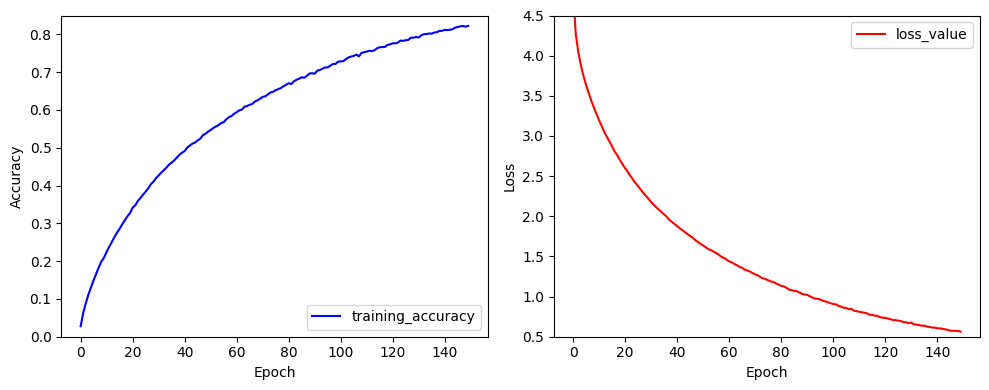

In [34]:

plt.rcParams["figure.figsize"] = [10,4]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot(1,2,1)
ax1.plot(model_trained.history['accuracy'], label='training_accuracy', color='b')
ax1.set_ylim(0, 0.85)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc="lower right")

ax2 = plt.subplot(1,2,2)
ax2.plot(model_trained.history['loss'], label='loss_value', color='r')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim(0.5,4.5)
ax2.legend(loc="upper right")